# **Notebook: Advanced Edge Detection and Segmentation**


## **1. Introduction**
This notebook demonstrates advanced edge detection and segmentation techniques using a real-world dataset.
We will:
- Apply edge detection techniques like Sobel and Canny.
- Use segmentation techniques such as Otsu's thresholding and K-means clustering.
- Combine these techniques to extract meaningful regions and information from the dataset.


## 2. Dataset Loading

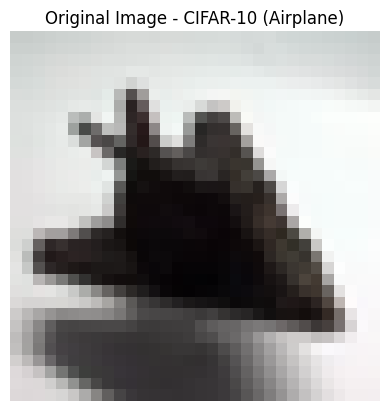

In [39]:
# Import necessary libraries
from tensorflow.keras.datasets import cifar10
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select a sample image (e.g., airplane - label 0)
sample_index = np.where(y_train == 0)[0][0]
sample_image = x_train[sample_index]

# Convert to RGB (CIFAR-10 images are in RGB format)
image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

'''
or
# Select a specific class (e.g., airplane, label 0)
class_label = 0
selected_indices = [i for i, label in enumerate(y_train) if label == class_label]
selected_image = x_train[selected_indices[0]]

# Convert the image to RGB if it's in grayscale
if len(selected_image.shape) == 2:
    selected_image = plt.cm.gray(selected_image)
    selected_image = selected_image[:, :, :3]
    selected_image = (selected_image * 255).astype('uint8')
'''

# Display the sample image
plt.title("Original Image - CIFAR-10 (Airplane)")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [3]:
sample_image.shape

(32, 32, 3)

In [ ]:
sample_index

29

In [ ]:
sample_index = np.where(y_train == 0)[0]

In [ ]:
sample_index

array([   29,    30,    35, ..., 49941, 49992, 49994])

In [ ]:
len(sample_index)

In [ ]:
sample_index = np.where(y_train == 0)

In [ ]:
sample_index

(array([   29,    30,    35, ..., 49941, 49992, 49994]),
 array([0, 0, 0, ..., 0, 0, 0]))

## 3. Grayscale Conversion

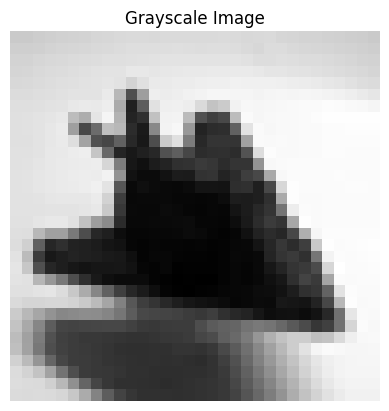

In [40]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.title("Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()


## 4. Sobel Edge Detection

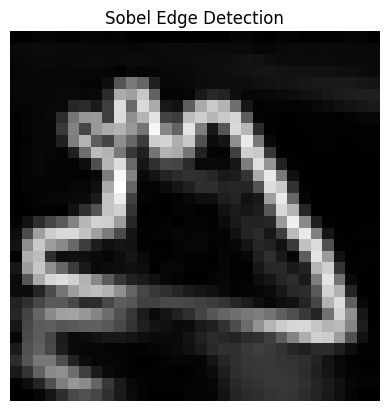

In [6]:
### Sobel Edge Detection
## 1. Use the Sobel operator to calculate the gradients in both x and y directions on "gray image"
## 2. Combine these gradients to compute the magnitude of edges.
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)   ## Apply on "gray image"
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)     ###  magnitude = Combine the two gradients x , y

# Display the Sobel edges
plt.title("Sobel Edge Detection")
plt.imshow(sobel, cmap='gray')
plt.axis('off')
plt.show()


## 5. Canny Edge Detection

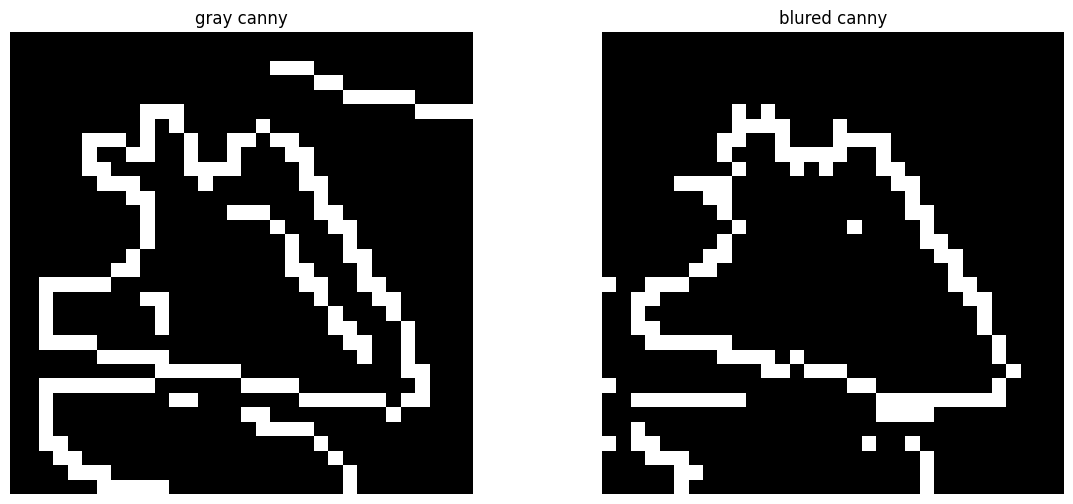

In [17]:
### Canny Edge Detection
# 1. Apply the Canny edge detection technique to the "grayscale image".
# 2. Experiment with different thresholds (low and high) for better results.  ## thresholds best between 50 & 100
canny_edges = cv2.Canny(gray_image, 50, 100)  ## Apply on "gray image"

## Display the Canny edges
# plt.title("Canny Edge Detection")
# plt.imshow(canny_edges, cmap='gray')
# plt.axis('off')
# plt.show()

# canny from blured image
blur = cv2.GaussianBlur(gray_image, (5,5), 2)
canny_blured = cv2.Canny(blur,50,100)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title("gray canny")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("blured canny")
plt.imshow(canny_blured, cmap='gray')
plt.axis('off')

plt.show()


## 6. Otsu's Thresholding

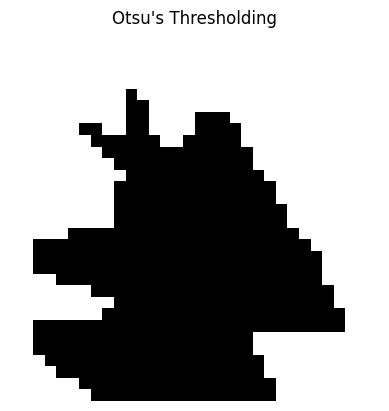

In [18]:
## Apply Otsu's thresholding
# 1. Apply Otsu's thresholding method to the grayscale image to segment it into binary regions. ---> ## auto detect threshold no. to segment
# 2. Use OpenCV's `cv2.threshold` function with the `THRESH_BINARY + THRESH_OTSU` flag.
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) ## Apply on "gray image"

# Display the thresholded image
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')
plt.show()


In [19]:
gray_image.shape

(32, 32)

## 7. K-Means Clustering

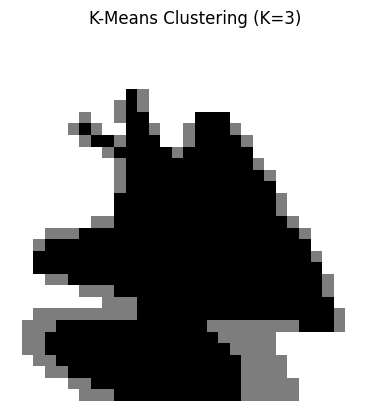

In [32]:
### Reshape the grayscale image for K-means clustering
# 1. Reshape the grayscale image into a 1D array suitable for clustering.
# 2. Use OpenCV's K-means function to cluster pixel intensity values into `K` clusters.
# 3. Reshape the clustered labels back into the original image shape.

Z = gray_image.reshape((-1, 1))
Z = np.float32(Z)  ## as cv.kmeans must take it this type and in a single column.

# Define K-means criteria and apply clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3  # Number of clusters
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) ## attempts: number of times the algorithm is executed using different initial labellings.
centers = np.uint8(centers)

clustered_image = centers[labels.flatten()].reshape(gray_image.shape)

# Display the clustered image
plt.title("K-Means Clustering (K=3)")
plt.imshow(clustered_image, cmap='gray')
plt.axis('off')
plt.show()


In [23]:
Z.shape

(1024, 1)

In [27]:
labels.shape

(1024, 1)

In [31]:
centers.shape

(3, 1)

## 8. Combining Results

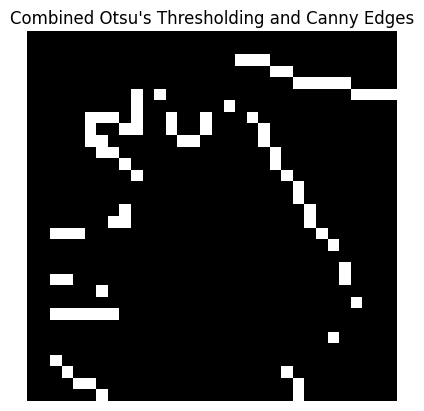

In [35]:
### Combine edge detection and segmentation results
# 1. Combine the results of Otsu's thresholding and Canny edge detection using a bitwise AND operation.
# 2. Use OpenCV's `cv2.bitwise_and` to merge the binary images.
combined = cv2.bitwise_and(otsu_thresh, canny_edges)

# Display the combined result
plt.title("Combined Otsu's Thresholding and Canny Edges")
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.show()


## 9. Extracting Meaningful Information

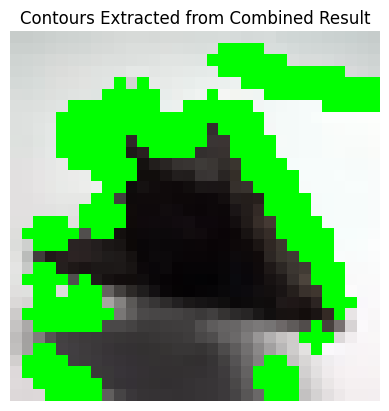

In [41]:
### Extract contours from the combined result
# 1. Use OpenCV's `cv2.findContours` to extract contours from the combined image.
# 2. Draw the extracted contours on the original RGB image using `cv2.drawContours`.
# 3. Display the resulting image with highlighted contours.
contours, _ = cv2.findContours(combined, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  ## apply on "segmented image" or "combined"
                    ##  first one is source image, second is contour retrieval mode, third is contour approximation method.
                    ## And it outputs the contours and hierarchy

# Draw contours on the original image
image_with_contours = image_rgb.copy()  ## as draw contours apply on it
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), thickness=2)  ## apply on "original image (rgb or bgr)"
      ## third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) ## 255 for green contour

# Display the image with contours
plt.title("Contours Extracted from Combined Result")
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()


## **9. Additional Task**

1. Experiment with different thresholds for Canny edge detection and observe how it impacts the results.
2. Try using different values of `K` in K-means clustering and analyze how regions are segmented.
3. Apply the pipeline (edge detection + segmentation + contour extraction) to different CIFAR-10 images.
4. Discuss how this integrated approach can be applied to other datasets or real-world projects.


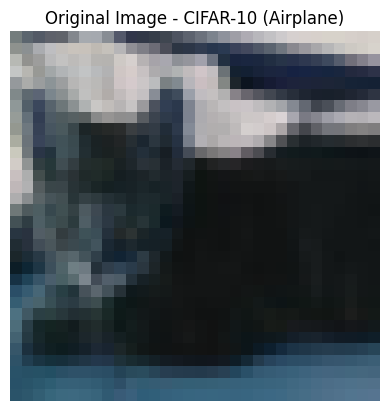

In [45]:
# Select a sample image (e.g., cat - label 3)
sample_index = np.where(y_train == 3)[0][0]
sample_image = x_train[sample_index]

# Convert to RGB (CIFAR-10 images are in RGB format)
image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display the sample image
plt.title("Original Image - CIFAR-10 (Airplane)")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [46]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

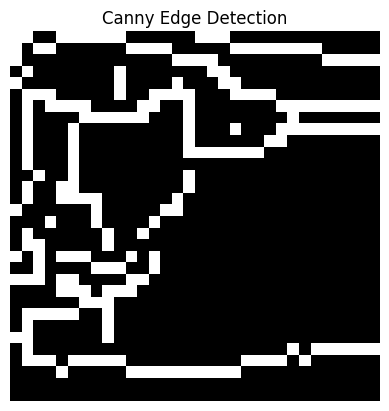

In [54]:
### Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 50, 100)

# Display the Canny edges
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')
plt.show()

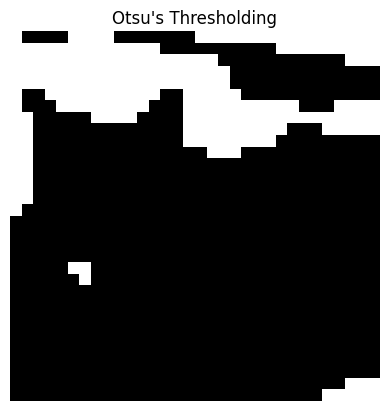

In [48]:
## Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Display the thresholded image
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')
plt.show()


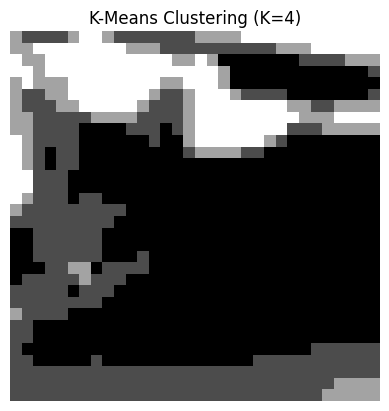

In [114]:
### Reshape the grayscale image for K-means clustering

Z = gray_image.reshape((-1, 1))
Z = np.float32(Z)

# Define K-means criteria and apply clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 60, 6.0)
K = 4
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 60, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

clustered_image = centers[labels.flatten()].reshape(gray_image.shape)

# Display the clustered image
plt.title("K-Means Clustering (K=4)")
plt.imshow(clustered_image, cmap='gray')
plt.axis('off')
plt.show()

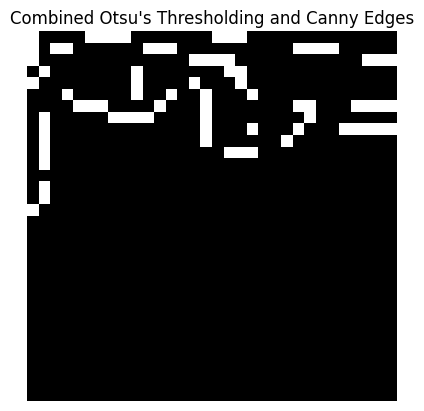

In [95]:
### Combine edge detection and otsu results
combined = cv2.bitwise_and(otsu_thresh, canny_edges)

# Display the combined result
plt.title("Combined Otsu's Thresholding and Canny Edges")
plt.imshow(combined, cmap='gray')
plt.axis('off')
plt.show()

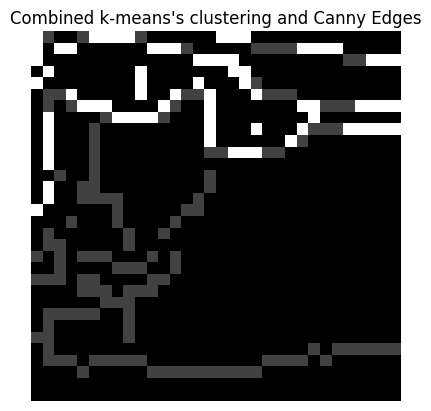

In [99]:
### Combine edge detection and k-meas results
combined_k = cv2.bitwise_and(clustered_image, canny_edges)

# Display the combined result
plt.title("Combined k-means's clustering and Canny Edges")
plt.imshow(combined_k, cmap='gray')
plt.axis('off')
plt.show()

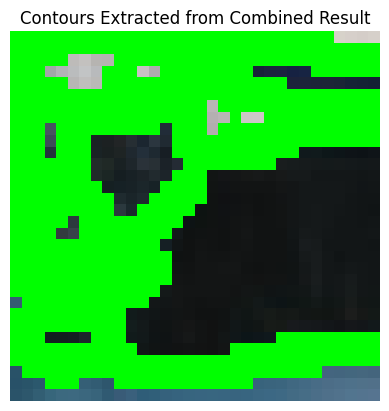

In [115]:
### Extract contours from the combined result
contours, _ = cv2.findContours(combined_k, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_contours = image_rgb.copy()  ## as draw contours apply on it
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), thickness=2)

# Display the image with contours
plt.title("Contours Extracted from Combined Result")
plt.imshow(image_with_contours)
plt.axis('off')
plt.show()
